We divide Partitions the data into K fixed groups by minimizing intra-cluster distanc and Choose K random centers.Assign each point to the nearest center ➔ Update centers.Get exactly K clusters after a few iterations.This clustering
 useful for Large datasets, know number of clusters (K) and is faster.Here we are taken kaggle dataset and tried to understand datset

Here i am using google colab by using json file(By importing json)Not specified here

Here I am Moving the kaggle JSON File and Set Permissions

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Here i am Installing the Kaggle CLI

In [4]:
!pip install -q kaggle

Below i am downloading kaggle dataset and credit goes to aajay20 for using his dataset

In [5]:
!kaggle datasets download -d aajay20/mall-customers-datacsv

Dataset URL: https://www.kaggle.com/datasets/aajay20/mall-customers-datacsv
License(s): unknown


unzipped the dataset for understanding information

In [6]:
!unzip mall-customers-datacsv.zip -d mall_customers_data

Archive:  mall-customers-datacsv.zip
  inflating: mall_customers_data/Mall_Customers.csv  


Importing some common libraries

In [7]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

Loading dataset for pre-processing

In [8]:
dataset = pd.read_csv('mall_customers_data/Mall_Customers.csv')

Listing what other directories i have in present directory

In [9]:
!ls

kaggle.json  mall_customers_data  mall-customers-datacsv.zip  sample_data


I want to know dataset header information -say how many cloumns does this .csv is divided

In [10]:
print(dataset.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Checking any nulls in our .csv for elimination eventhough not directly relating to k-means

In [11]:
print(dataset.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


The below shows row/cloumn position in response to numpy array

In [12]:
x = dataset.iloc[:, [3, 4]].values


With in cluster sum of squares -Here we are creatong an empty list to store WCSS values

In [13]:
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

Here I am deciding the best number of clusters (k) for KMeans by using elbow method.The "elbow" point where WCSS stops decreasing sharply

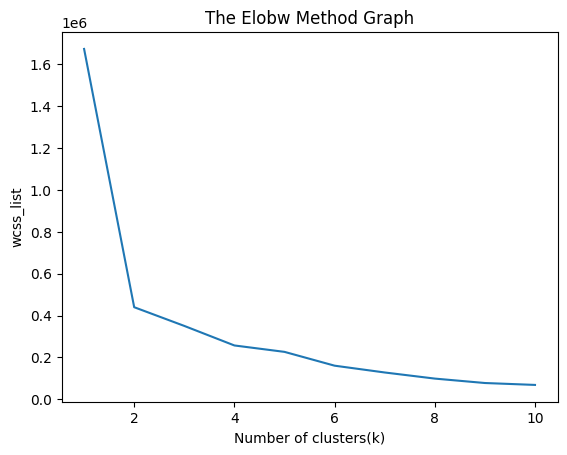

In [14]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elobw Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

Now I am training on k -means clusters with random state

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

The final Step is ploting table in visual treat

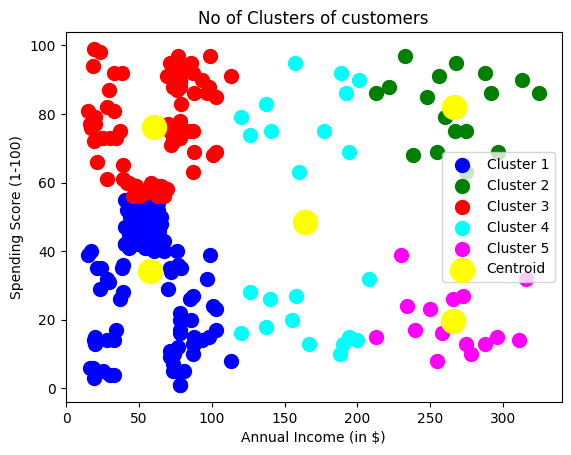

In [16]:
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') # 1 cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') # 2 cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') # 3 cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') # 4 cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') # 5cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('No of Clusters of customers')
mtp.xlabel('Annual Income (in $)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()
